In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
import numpy as np
import os

from astropy import units as u

import blimpy as bl
import setigen as stg

import lprofiler as lp

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [2]:
%matplotlib inline

In [4]:
frame = stg.Frame.from_backend_params(
                            fchans=512,
                            tchans=16, 
                            obs_length=300, 
                            sample_rate=3e9, 
                            num_branches=1024,
                            fftlength=1048576,
                            fch1=8*u.GHz,
                            ascending=False)
frame.shape

(16, 512)

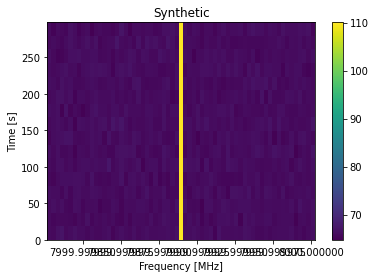

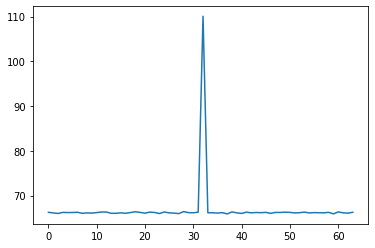

In [41]:
frame = stg.Frame.from_backend_params(
                            fchans=64,
                            tchans=16, 
                            obs_length=300, 
                            sample_rate=3e9, 
                            num_branches=1024,
                            fftlength=1048576,
                            fch1=8*u.GHz,
                            ascending=False)
frame.add_noise_from_obs()
frame.add_signal(stg.constant_path(f_start=frame.get_frequency(32),
                                    drift_rate=0*u.Hz/u.s),
                  stg.constant_t_profile(level=frame.get_intensity(1e6)),
                  stg.sinc2_f_profile(width=(2*0.442946470689452)*frame.df, trunc=False),
                  stg.constant_bp_profile(level=1))

frame.bl_plot()
plt.show()
plt.plot(stg.db(frame.integrate()))
plt.show()

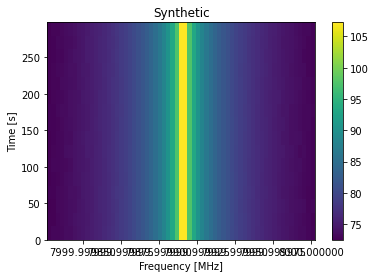

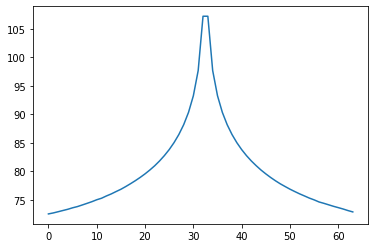

In [46]:
frame = stg.Frame.from_backend_params(
                            fchans=64,
                            tchans=16, 
                            obs_length=300, 
                            sample_rate=3e9, 
                            num_branches=1024,
                            fftlength=1048576,
                            fch1=8*u.GHz,
                            ascending=False)
frame.add_noise_from_obs()
frame.add_signal(stg.constant_path(f_start=frame.get_frequency(32)+frame.df/2,
                                    drift_rate=0*u.Hz/u.s),
                  stg.constant_t_profile(level=frame.get_intensity(1e6)),
                  stg.sinc2_f_profile(width=(2*0.442946470689452)*frame.df, trunc=False),
                  stg.constant_bp_profile(level=1))

frame.bl_plot()
plt.show()

plt.plot(stg.db(frame.integrate()))
plt.show()